---
layout: post
title:  "Logistic Regression"
date:   2023-03-06 2:14:54 +0700
categories: jekyll update
---

# TOC

- [Definition](#define)
- [Maximum likelihood](#maxili)
- [Stochastic gradient descent ](#sgrad)
- [Code example](#code)

# Definition <a name="define"></a>
Remind us a bit about linear regression:

$$ \hat{y}=h_{\theta}(x) = \theta \cdot x $$

Where $$ h_{\theta} $$ is the hypothesis function with parameter vector $$ \theta $$. $$ h_{\theta} $$ is supposed to turn input x into output y. Now, to make it more interesting, we would examine a non-linear relationship by wrapping the y hat in the logistic function. Here is the logistic function (also called sigmoid which means s-shape):

$$ \sigma(z) = \frac{1}{1+e^{-z}} \in (0,1) $$

<img src='https://images.viblo.asia/36d15a7f-4d7d-4b4c-8bde-72b3fbaf842c.png'>
<p style="font-size:9px">Source:https://viblo.asia/p/logistic-regression-bai-toan-co-ban-trong-machine-learning-924lJ4rzKPM</p>

Let $$ z = \hat{y} = \theta \cdot x $$,  we have a new hypothesis function:

$$ h_{\theta}(x)=\sigma(\theta^{\top}x)=\frac{1}{1+e^{-\theta^{\top}x}} $$

There is one reason for us to support the logistic function: its derivative is pretty straightforward:

$$ \sigma'(z)=\frac{\partial}{\partial x}\frac{1}{1+e^{-z}}=\frac{1}{(1+e^{-z})^{2}}e^{-z}=\frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}})=\sigma(z)(1-\sigma(z)) $$

Let’s go back to discuss the characteristics of the logistic function. As we know, linear regression outputs a value without bounds. The logistic function, on the other hand, outputs only between 0 and 1. Since that character makes output of the logistic function looks very similar to a probability, let us consider a classification problem with n classes: with input x, we have a probability of $$ \sigma(\hat{y}(x^{(i)})) $$ that the output y would belong to class i.

To make it simple, we start with n = 2, in this case, we call our problem a binary classification. Since there are only 2 classes, we denote one class to be 0 (y = 0 in this case), the other class to be 1 (y = 1). The probability of y equal 1, depending on input x and parameter , would be the linear combination of x and $$ \theta $$, just like in a linear regression but with an extra transformation of going through the sigmoid function. The probability of y equal 0 would simply be the residual of 1 minus the probability of y equal 1. In mathematical notation:

$$ P(y=1|x;\theta) = h_{\theta}(x) $$ 

$$ P(y=0|x;\theta) = 1 - h_{\theta}(x) $$

The above two definition can be written equivalently as in the following equation:

$$ \Leftrightarrow p(y|x;\theta) = (h_{\theta}(x))^{y}(1-h_{\theta}(x))^{1-y} $$

Let’s check: with y = 0, the first factor equals 1 since a number to the power of 0 equals 1. The second factor has the power 1 - 0 = 1, hence it is itself $$ 1-h_{\theta}(x) $$, this gives us the probability of y equal 0, exactly as above. Similarly, with y = 1, the second factor has a power of 0 hence its value is 1. The first factor equals itself $$ h_{\theta}(x) $$ hence the probability of y = 1, exactly as above.


# Maximum likelihood <a name="maxili"></a>


Remember the maximum likelihood: given training set X and target vector y, we want to find parameters  such that the joint probability of all output y to be maximum. In other words, we find  so that the probability that the entire target vector y happens is the highest possible. With this in mind, the problem becomes:

$$ max_{\theta} P(y|X;\theta) $$

$$ \Leftrightarrow \theta = arg max_{\theta}P(y|X;\theta) $$

Assume i.i.d (data is independently and identically distributed), here is the likelihood:

$$ P(y|X;\theta)=\prod_{i=1}^{n}P(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^{n}(h_{\theta}(x^{(i)}))^{y^{(i)}}(1-h_{\theta}(x^{(i)}))^{1-y^{(i)}} $$

To make it simpler, we use the log likelihood as a substitute for the likelihood:

$$ l(\theta)=logP(y|X;\theta)=\sum_{i=1}^{n}y^{(i)}log h(x^{(i)})+(1-y^{(i)})log(1-h(x^{(i)})) $$ 

Applying gradient descent, just like in the case of linear regression, we have the update rule for parameters: $$ \theta \leftarrow \theta + \alpha \nabla_{\theta}l(\theta) $$ with plus for maximization instead of minus for minimization.


# Stochastic gradient descent <a name="sgrad"></a>


As mentioned in the linear regression post, a full batch gradient descent utilizes the entire training set for calculation, a mini-batch gradient descent uses only a part of the training data at a time. By that, the stochastic gradient descent uses only one training instance for the calculation of the loss function. To take it from the previous section, we would use the log likelihood function for our purpose, and instead of gradient descent, we would use gradient ascent to maximize the log likelihood. Let’s take the derivative of the log likelihood function (we ascent one dimension/one parameter at a time):


$$ \frac{\partial}{\partial \theta_{j}}l(\theta) = (\frac{y}{h(x)}-\frac{1-y}{1-h(x)})\frac{\partial}{\partial \theta_{j}}h(x) $$


Since h(x) is the logistic function, we apply the neat derivative of logistic h(x) to be 


$$ \frac{\partial}{\partial_{j}} h(x) = h(x)(1-h(x)) $$


The above (bigger) derivative becomes:

$$ \frac{\partial}{\partial \theta_{i}}l(\theta) = (\frac{y}{h(x)}-\frac{1-y}{1-h(x)})h(x)(1-h(x))\frac{\partial}{\partial_{j}}\theta^{\top}x $$

$$ = (y(1-h(x))-(1-y)h(x))x_{j} $$

$$ =(y-y.h(x)-h(x)+y.h(x))x_{j}=(y-h(x))x_{j}  $$

This is the stochastic gradient ascent rule:

$$ \theta_{j} \leftarrow  \theta_{j}+\alpha(y^{(i)}-h_{\theta}(x^{(i)}))x^{(i)}_{j} $$

Notice that y - h(x) is the difference between the true value and the predicted value, so the general idea holds that we guide our step on the landscape by measuring how right we are when we make small steps on the landscape. You would come to the same conclusion if you define a loss function and minimize it.

For binary classification, apart from using the logistic function in the hypothesis function, we can apply this versatile function to the loss function. For example, we can define a loss function to be:

$$ Loss(x,y,\theta) = log(1+e^{-(\theta x)y}) $$

If x is the confidence in predicting positive y, we call the $$ (\theta x)y = \hat{y}.y $$ the margin (how correct we are). Notice that the margin (correctness) uses both true y and predicted y and they multiply with each other.

# Code example <a name="code"></a>

Let’s take a simple example for healthcare: given an array of breast tumor sizes, and an array of targets in which y = 1 means it is a cancerous tumor and y = 0 means it is a benign tumor. We can train a logistic regression on this small dataset and make use of sklearn’s predict and predict_proba method. Predict gives hard classification (the results are forced into 0 and 1) while predict_proba gives soft classification (the results are probability of belonging into positive prediction)

In [9]:
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)
y_pred=logr.predict(X)
print(y_pred)
y_pred_soft=logr.predict_proba(X)
print(y_pred_soft)

[1 0 0 0 0 0 1 1 1 1 1 1]
[[0.39250045 0.60749955]
 [0.80731124 0.19268876]
 [0.87224114 0.12775886]
 [0.99044779 0.00955221]
 [0.91961384 0.08038616]
 [0.92654363 0.07345637]
 [0.11637257 0.88362743]
 [0.22098622 0.77901378]
 [0.11075591 0.88924409]
 [0.18706503 0.81293497]
 [0.42280871 0.57719129]
 [0.03335757 0.96664243]]


The first observation is incorrectly classified as a dangerous case in the hard classification algorithm. In the soft version (probabilistic), the propensity of having cancer is only 61%, the graph below shows how soft the prediction becomes using the logistic function:

In [32]:
colors=[]
y_max=[]
for i in y_pred_soft:
    y_max.append(i[1])
    if i[0]>i[1]:
        colors.append('b')
    else:
        colors.append('r')

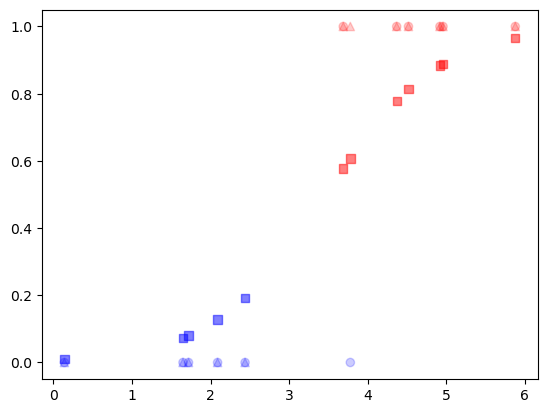

In [39]:
plt.scatter(X,y,alpha=0.2,color=['b','b','b','b','b','b','r','r','r','r','r','r'])
plt.scatter(X,y_pred,marker='^',alpha=0.2,color=['r','b','b','b','b','b','r','r','r','r','r','r'])
plt.scatter(X,y_max,marker='s',alpha=0.5,color=colors)

![3LogReg_4_1](https://user-images.githubusercontent.com/7457301/223472456-922e63cd-ce6f-46d8-ad74-a4040570dfd8.png)

Another example uses a fish data set. We have a dataset that classified fish into 7 categories. We preprocess data by using a scaler and encode the label into numbers. Then we split the data into a train and a test set, for the sake of validating. 

In [1]:
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


fish = pd.read_csv(dataset_url, error_bad_lines=False)
X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/var/folders/kf/5_ggvsz93vxdbx_h0tvy66xh0000gn/T/ipykernel_3145/1694655126.py:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fish = pd.read_csv(dataset_url, error_bad_lines=False)


When we plot the scatters of the train and test set, we see a similar distribution. This is a good sign, since we would like our training set to be close to the test set, this would reduce error. 

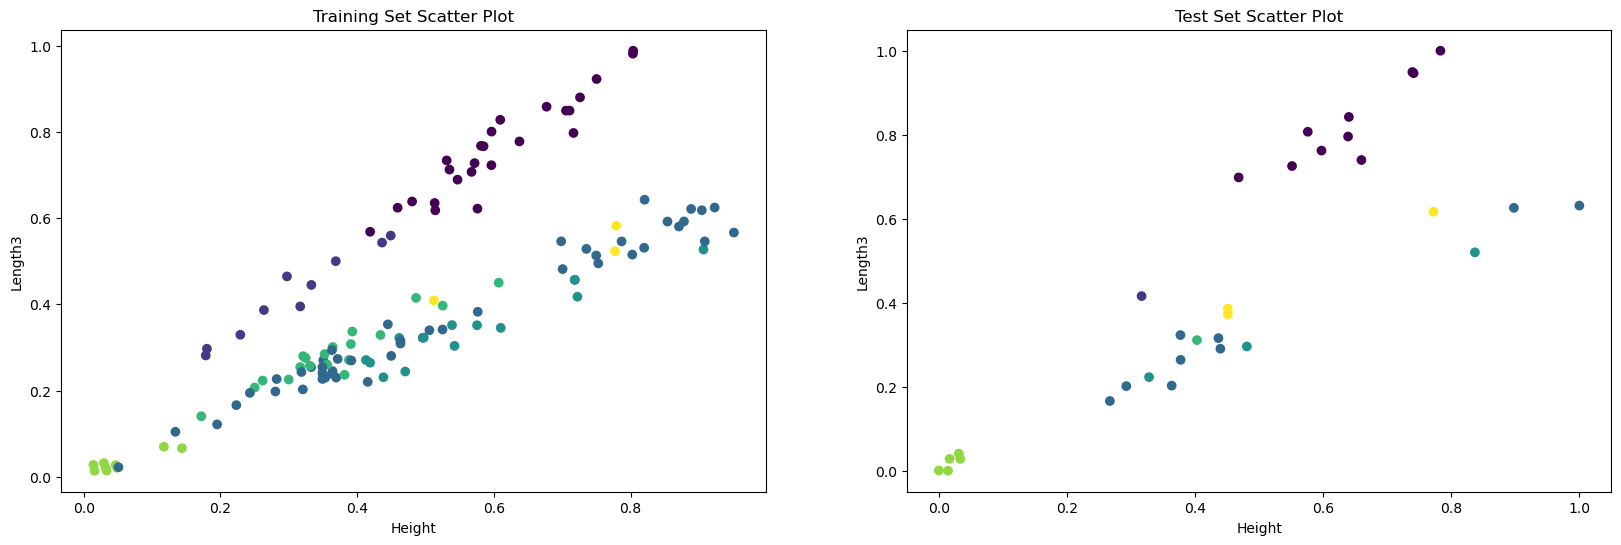

In [45]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,5], X_train[:,4], c = y_train)
plt.xlabel('Height')
plt.ylabel('Length3')
plt.title('Training Set Scatter Plot')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,5], X_test[:,4], c = y_test)
plt.xlabel('Height')
plt.ylabel('Length3')
plt.title('Test Set Scatter Plot')
plt.show()



![3LogReg_8_0](https://user-images.githubusercontent.com/7457301/223472468-641b6306-5a15-48d8-98e5-1efa8f5065fd.png)

Then we run the logistic regression estimator from sklearn. The accuracy is 81.25% and we plot the confusion matrix. The confusion matrix is a visual representation to check how correct we are at our prediction. For example, number 3 in the bottom row of the matrix means that there are 3 predictions for the input in class number 2 but the real targets turn out to belong to class number 6. Then we retrieve the importance of each feature, the “Height” attribute/feature is the most important one, contributing 77% of the prediction information. Then comes the Length3.

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion Matrix')

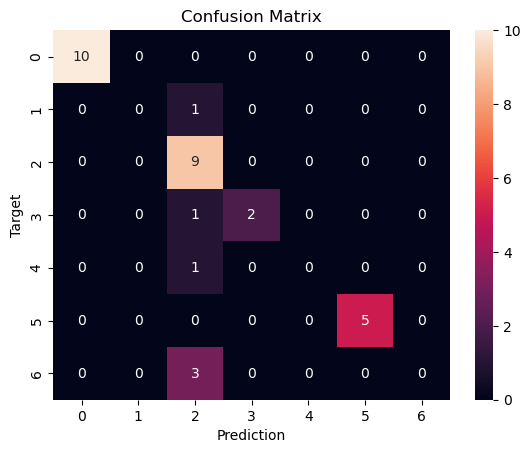

In [43]:
# training the model
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')


![3LogReg_10_2](https://user-images.githubusercontent.com/7457301/223472472-4becbc9e-a699-4d7c-80dd-5bca4592e396.png)

In [46]:
clf.coef_[0]


array([ 0.34202933, -0.0568451 ,  0.04333105,  0.60957822,  3.81719467,
        0.18893405])

In [47]:
X.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')